    1. Package load
    2. Data load
    3. Data 탐색(EDA)
    4. 상관분석
    
    5. 결론 : 경기도 광명시 ( 22645 )
       1) 오후 5시 이후 부터 다음날 오전 0시까지 많이 빌림
       2) 계절적 : 20대 8월 ,7월 순 / 29,33주차 순   특이 : 30대 15,16시간대
       3) 차종 : 경형 >  준중형 > 준중형suv  / 
          - 경형:  30.580702 , 준중형: 29.269154,  준중형SUV: 20.167807, 소형SUV : 9.141091 ,  
       4) 토요일: 16.696843 , 일요일: 14.338706 .. 특이 요일평균 14% 이상 
       5) term 제외 : 장기 렌트 제외 
          90%로 계산 :20440  ... 결과 다소 나음 
          나이 50대 이하 , 차종 4가지(경형, 준중형, 소형suv, 준준형suv) 계산 : 17616 (77.7%)


In [1]:
# pandas를 pd이름으로 호출
import requests
from io import BytesIO
from itertools import product
from datetime import datetime

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.ticker as plticker
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

plt.rc('font', family='NanumGothic')
plt.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"] = (22,4)

In [2]:
# customer_lib_1.csv 파일을 불러와서 변수 customer_1 값으로 할당

df = pd.read_csv('../div_data/광명시.csv')
df_final = pd.read_csv('../data/230119_final_join.csv')

In [3]:
df_final['region2'].unique()

array(['고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '광명시', '구리시', '김포시', '남양주시',
       '성남시 분당구', '성남시 수정구', '성남시 중원구', '안양시 동안구', '안양시 만안구', '양평군',
       '의정부시', '하남시', '화성시'], dtype=object)

In [4]:
#data 확인
df.head()

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,r_weeknum,r_year,r_month,r_yyyyww,s_weeknum,s_year,s_month,s_yyyyww,date_term
0,경기도,광명시,2019-10-08 12:27:53+00:00,2019-10-07 19:30:00+00:00,1,male,소형SUV,1,0,0,41,2019,2019-10,2019-41,41,2019,2019-10,2019-41,16.96
1,경기도,광명시,2019-05-14 12:50:00+00:00,2019-05-13 13:00:00+00:00,4,male,준중형SUV,1,0,0,20,2019,2019-05,2019-20,20,2019,2019-05,2019-20,23.83
2,경기도,광명시,2019-01-11 17:14:14+00:00,2019-01-11 13:30:00+00:00,1,male,소형SUV,4,4,0,2,2019,2019-01,2019-2,2,2019,2019-01,2019-2,3.74
3,경기도,광명시,2019-04-07 19:54:19+00:00,2019-04-07 10:30:00+00:00,3,female,소형SUV,6,6,1,14,2019,2019-04,2019-14,14,2019,2019-04,2019-14,9.41
4,경기도,광명시,2019-09-20 22:47:39+00:00,2019-09-20 16:20:00+00:00,2,male,준중형,4,4,0,38,2019,2019-09,2019-38,38,2019,2019-09,2019-38,6.46


In [5]:
#EDA  ... 지역 확인
print("region1 : ",len(df['region1'].unique()))
print(df['region1'].unique())
print("region2 : ",len(df['region2'].unique()))
print(df['region2'].unique())
print(len(df))

region1 :  1
['경기도']
region2 :  1
['광명시']
22645


In [6]:
df['index_int'] = ''

for i , value in enumerate(df['region1']):
    df['index_int'][i] = i


/tmp/ipykernel_32/3612480014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['index_int'][i] = i


In [7]:
df['reservation_return_hour3'] = ''
for i , value in enumerate(df['reservation_return_at']):
    temp = str(df['reservation_return_at'][i])
    df['reservation_return_hour3'][i] = temp[10:13]

/tmp/ipykernel_32/818228797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_return_hour3'][i] = temp[10:13]


In [8]:
#column 변경  : object > date 
df['reservation_return_at'] = pd.to_datetime(df['reservation_return_at'])
df['reservation_start_at'] = pd.to_datetime(df['reservation_start_at'])
df['gender'] = df['gender'].astype(str)
df['car_model'] = df['car_model'].astype(str)
df['region1'] = df['region1'].astype(str)
df['region2'] = df['region2'].astype(str)

In [9]:

df['reservation_return_date'] = df['reservation_return_at'].dt.to_period(freq = 'D')
df['reservation_start_date'] = df['reservation_start_at']. dt.to_period(freq = 'D')
df['reservation_return_hour'] = df['reservation_return_at'].dt.to_period(freq = 'H')
df['reservation_start_hour'] = df['reservation_start_at']. dt.to_period(freq = 'H')


/opt/conda/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [10]:
temp_hour = df['reservation_return_hour3'].value_counts().sort_index()

In [11]:
df_weekend = df[df['is_weekend'] == 1]  
print(round(len(df_weekend)/len(df),2))
temp_weekend_hour = df_weekend['reservation_return_hour3'].value_counts().sort_index()

0.31


In [12]:
df_weekday = df[df['is_weekend'] == 0]  
print(round(len(df_weekday)/len(df),2))
temp_weekday_hour = df_weekday['reservation_return_hour3'].value_counts().sort_index()

0.69


<AxesSubplot:>

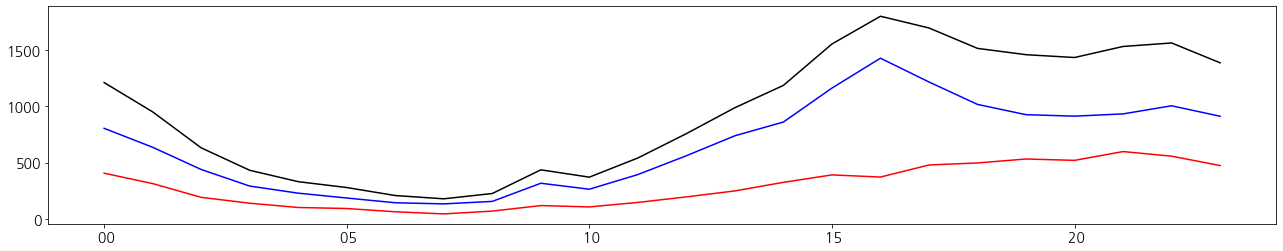

In [13]:
temp_hour.plot(color='black')
temp_weekday_hour.plot(color='blue')
temp_weekend_hour.plot(color='red')

In [14]:
print("s_month : ",len(df['s_month'].unique()))
print(df['s_month'].unique())
print(df['s_month'].value_counts().sort_index())

s_month :  12
['2019-10' '2019-05' '2019-01' '2019-04' '2019-09' '2019-03' '2019-11'
 '2019-07' '2019-02' '2019-08' '2019-06' '2019-12']
2019-01    1731
2019-02    1745
2019-03    1952
2019-04    1918
2019-05    2047
2019-06    2048
2019-07    2185
2019-08    2299
2019-09    2197
2019-10    2268
2019-11    2233
2019-12      22
Name: s_month, dtype: int64


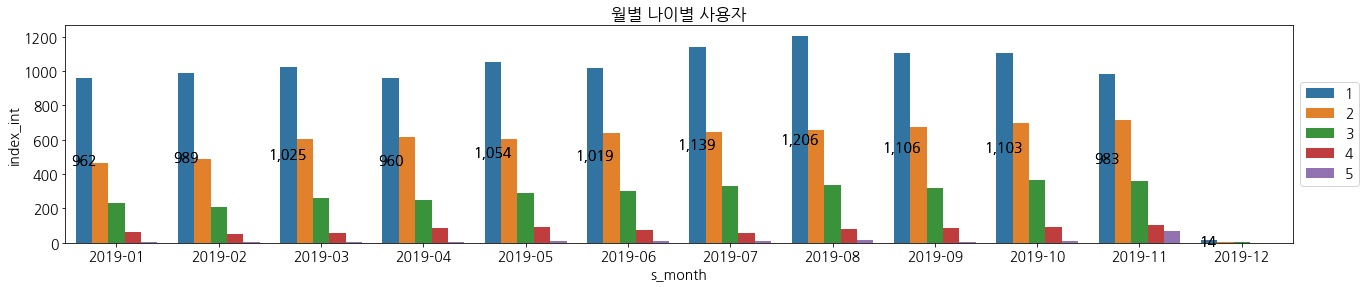

In [15]:
#EDA  ... 지역별 월별 사용자 확인(3) .. 지역 2
grouped = df.groupby([df['age_group'], df['s_month']]).count().sort_values(by='s_month')
ax = sns.barplot(data=grouped.reset_index(), x='s_month', y='index_int', hue='age_group')

containers = ax.containers[0]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
# plt.rcParams['font.size'] = 8
plt.title('월별 나이별 사용자')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# 20대 7월, 8월,5월 순 

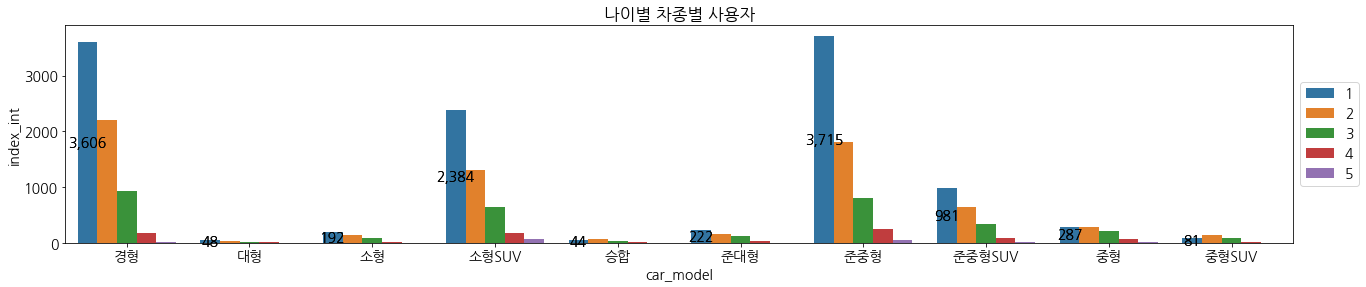

In [16]:
#EDA  ... 지역별 월별 사용자 확인(3) .. 지역 2
grouped = df.groupby([df['age_group'], df['car_model']]).count().sort_values(by='car_model')
ax = sns.barplot(data=grouped.reset_index(), x='car_model', y='index_int', hue='age_group')

containers = ax.containers[0]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
# plt.rcParams['font.size'] = 8
plt.title('나이별 차종별 사용자')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# 20대, 경형, 소형suv , 준중형 순

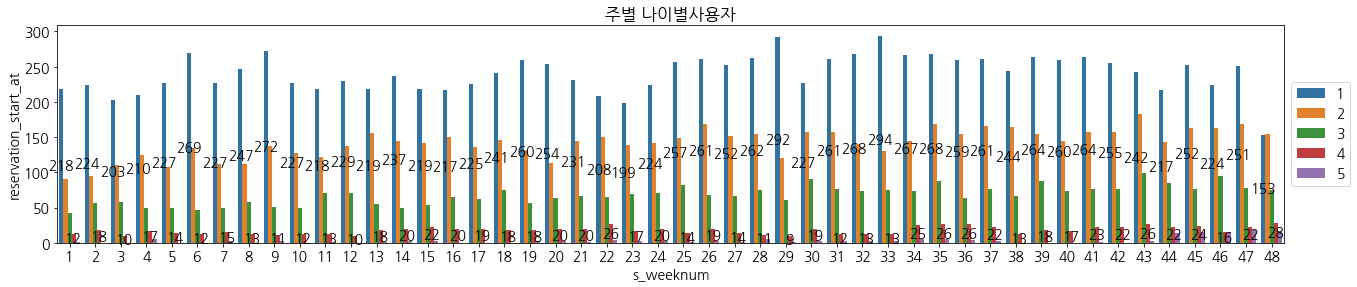

In [17]:
#EDA  ... 지역별 월별 사용자 확인(3) .. 지역 2
grouped = df.groupby([df['age_group'], df['s_weeknum']]).count().sort_values(by='s_weeknum')
ax = sns.barplot(data=grouped.reset_index(), x='s_weeknum', y='reservation_start_at', hue='age_group')

containers = ax.containers[-2]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
# plt.rcParams['font.size'] = 8
plt.title('주별 나이별사용자')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#20대 29,33주차 순 

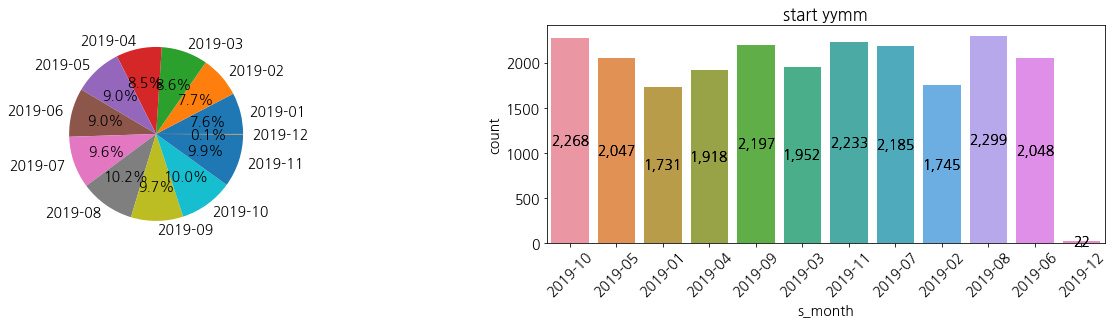

In [18]:
# axes[0].plot(x, y)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['s_month']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
# plt.title('지역별 사용자')

ax = sns.countplot(data=df, x='s_month')  #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('start yymm')
plt.xticks(rotation=45)
plt.show()
# 10월, 7월 순

In [19]:
print(df['age_group'].unique())
print(df['age_group'].value_counts()) # 1 : 20~29 세, 2 : 30~39 세, 3 : 40~49 세,- 4 : 50~59 세,- 5 : 60세 이상

[1 4 3 2 5]
1    11560
2     6822
3     3262
4      849
5      152
Name: age_group, dtype: int64


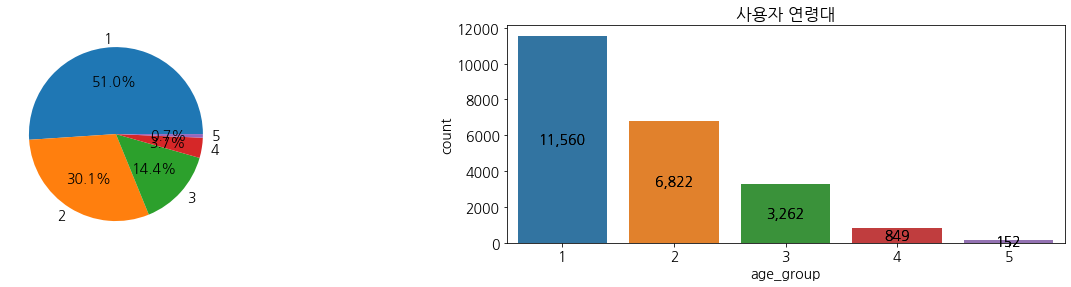

In [20]:
#EDA  ...사용자 연령대 (1)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['age_group']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('사용자 연령대')

ax = sns.countplot(data=df, x='age_group')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('사용자 연령대')
plt.show()

In [21]:
#EDA  ...사용자 연령대 (2)
print(df['gender'].unique())
print(df['gender'].value_counts()) # 1 : 20~29 세, 2 : 30~39 세, 3 : 40~49 세,- 4 : 50~59 세,- 6 : 60세 이상

['male' 'female' 'unknown']
male       18464
female      3431
unknown      750
Name: gender, dtype: int64


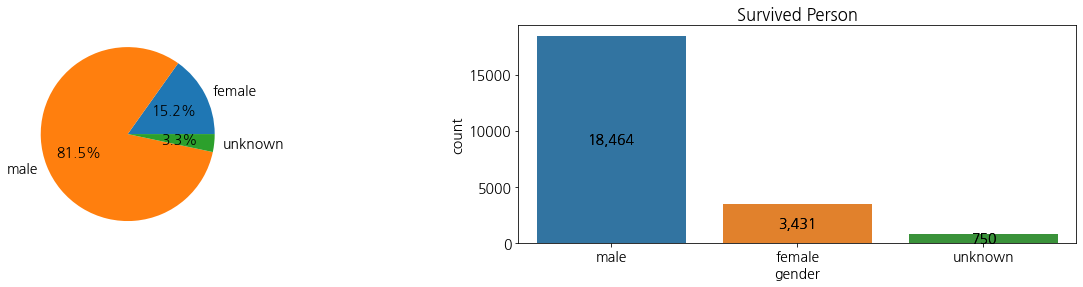

In [22]:
#EDA  ...사용자 성별(1)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['gender']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('지역별 사용자')

ax = sns.countplot(data=df, x='gender')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Survived Person')
plt.show()

In [23]:
#EDA  ...차종별  ['경형' '준중형' 준중형SUV' '소형SUV' '소형' '준대형' '중형' ??? 중형SUV' '승합' '??수입' ??'대형']
print("car_model : ",len(df['car_model'].unique()))
print(df['car_model'].unique().sort())
print(df['car_model'].value_counts()) 

car_model :  10
None
경형        6925
준중형       6628
소형SUV     4567
준중형SUV    2070
중형         863
준대형        544
소형         436
중형SUV      329
승합         176
대형         107
Name: car_model, dtype: int64


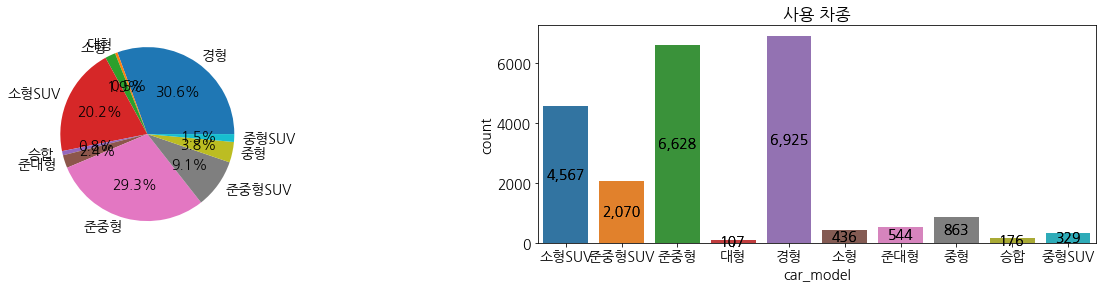

In [24]:
#EDA  ...차종별(1)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['car_model']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('사용 차종')

ax = sns.countplot(data=df, x='car_model')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('사용 차종')
plt.show()

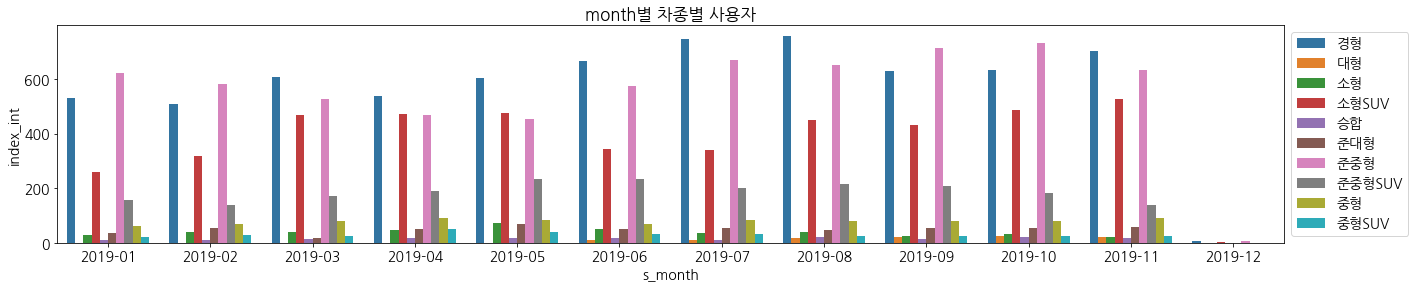

In [25]:
#EDA  ...차종별(1)  ..+지역별
grouped = df['index_int'].groupby([df['region2'], df['car_model'],df['s_month']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='s_month', y='index_int', hue='car_model')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('month별 차종별 사용자')
# plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#2,3,4,5 준중형, 그 외 경형

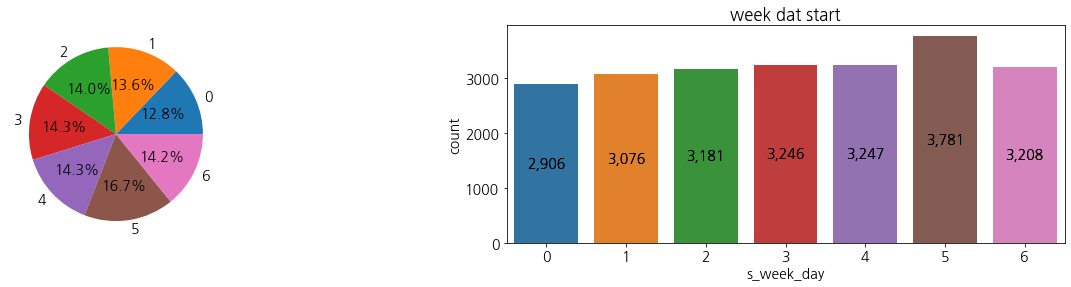

In [26]:
#EDA  ...weekday(1)  0 월요일 .... 6 일요일
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,6)
plt.rc('figure', titlesize=12)
plt.rc('axes', labelsize=10) 

pie_data = df.groupby(['s_week_day']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('week dat start')

ax = sns.countplot(data=df, x='s_week_day')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('week dat start')
plt.show()

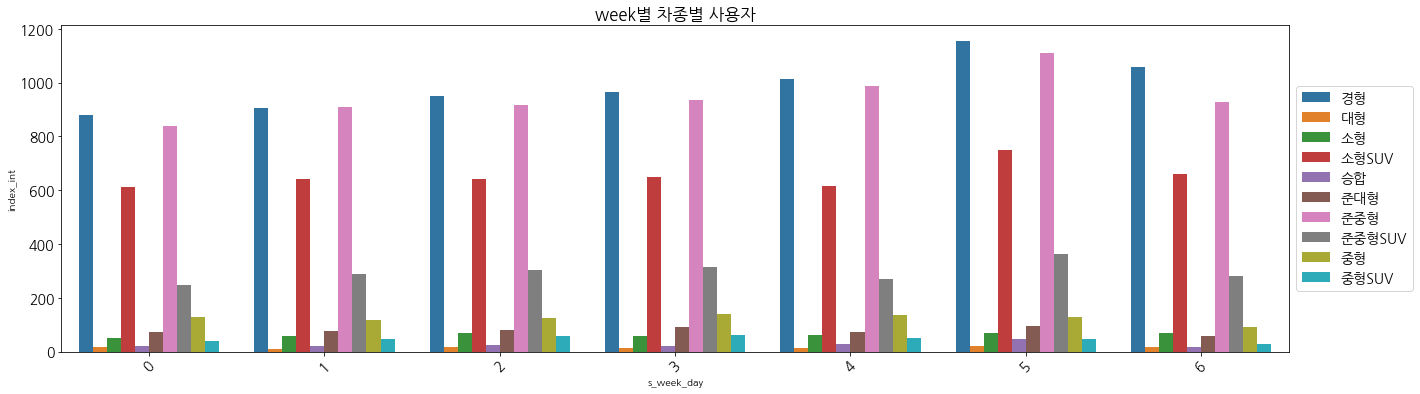

In [27]:
#EDA  ...차종별(1)  ..+지역별2
grouped = df['index_int'].groupby([df['s_week_day'], df['car_model']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='s_week_day', y='index_int', hue='car_model')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 차종별 사용자')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#경형, > 준중형 > 소형suv

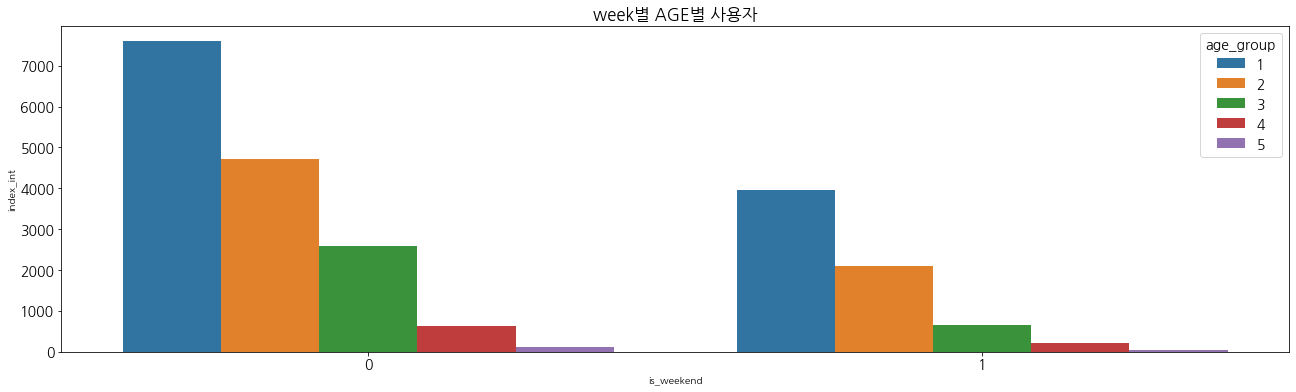

In [28]:
#EDA  ...weekday(1) + 지역
grouped = df['index_int'].groupby([df['is_weekend'],df['age_group']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='is_weekend', y='index_int', hue='age_group')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 AGE별 사용자')
# plt.xticks(rotation=45)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


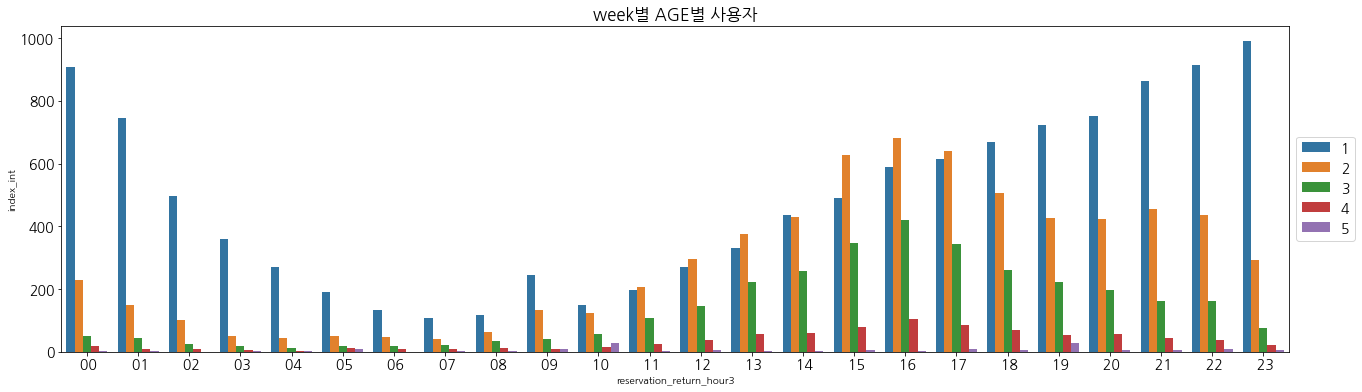

In [29]:
#EDA  ...weekday(1) + 지역
grouped = df['index_int'].groupby([df['reservation_return_hour3'],df['age_group']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='reservation_return_hour3', y='index_int', hue='age_group')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 AGE별 사용자')
# plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#오후 3시 이후 많이 빌림

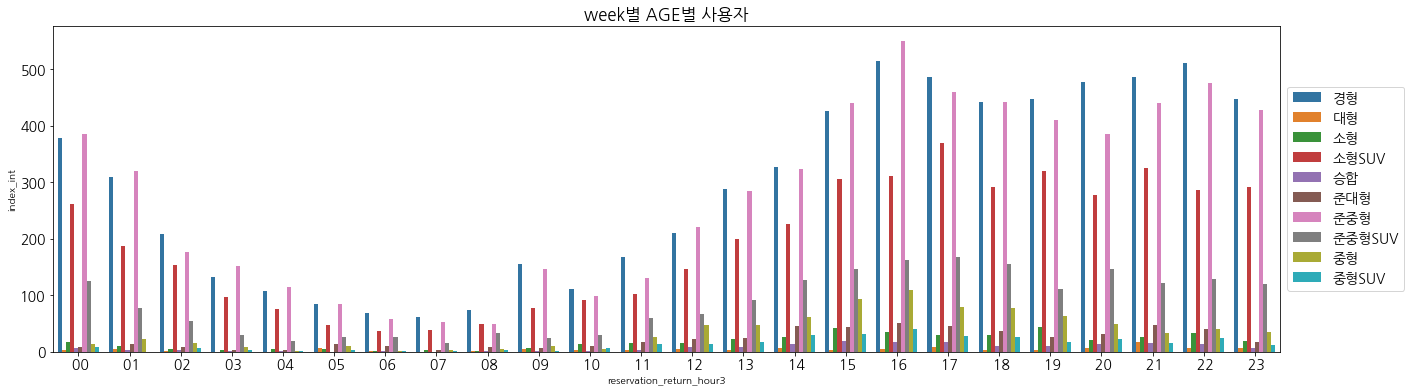

In [30]:
#EDA  ...weekday(1) + 지역
grouped = df['index_int'].groupby([df['reservation_return_hour3'],df['car_model']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='reservation_return_hour3', y='index_int', hue='car_model')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 AGE별 사용자')
# plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


상관분석---------------------------------------------------------------------------------------------------------------------------

In [31]:
df1 = df

In [32]:
df1.head()

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,...,s_year,s_month,s_yyyyww,date_term,index_int,reservation_return_hour3,reservation_return_date,reservation_start_date,reservation_return_hour,reservation_start_hour
0,경기도,광명시,2019-10-08 12:27:53+00:00,2019-10-07 19:30:00+00:00,1,male,소형SUV,1,0,0,...,2019,2019-10,2019-41,16.96,0,12,2019-10-08,2019-10-07,2019-10-08 12:00,2019-10-07 19:00
1,경기도,광명시,2019-05-14 12:50:00+00:00,2019-05-13 13:00:00+00:00,4,male,준중형SUV,1,0,0,...,2019,2019-05,2019-20,23.83,1,12,2019-05-14,2019-05-13,2019-05-14 12:00,2019-05-13 13:00
2,경기도,광명시,2019-01-11 17:14:14+00:00,2019-01-11 13:30:00+00:00,1,male,소형SUV,4,4,0,...,2019,2019-01,2019-2,3.74,2,17,2019-01-11,2019-01-11,2019-01-11 17:00,2019-01-11 13:00
3,경기도,광명시,2019-04-07 19:54:19+00:00,2019-04-07 10:30:00+00:00,3,female,소형SUV,6,6,1,...,2019,2019-04,2019-14,9.41,3,19,2019-04-07,2019-04-07,2019-04-07 19:00,2019-04-07 10:00
4,경기도,광명시,2019-09-20 22:47:39+00:00,2019-09-20 16:20:00+00:00,2,male,준중형,4,4,0,...,2019,2019-09,2019-38,6.46,4,22,2019-09-20,2019-09-20,2019-09-20 22:00,2019-09-20 16:00


In [33]:
my_map = {
    "male": "1",
    "female": "0",
    "unknown":"2"
}

In [34]:
df1["gender"] = df1["gender"].map(my_map)

In [35]:
print(df1["gender"].value_counts())
print((df1["gender"].value_counts() / df1["gender"].count())*100)

1    18464
0     3431
2      750
Name: gender, dtype: int64
1    81.536763
0    15.151248
2     3.311989
Name: gender, dtype: float64


In [36]:
my_map2 = {
    '경형':'1',
    '준중형':'2',
    '준중형SUV':'3',
    '소형SUV':'4',
    '소형':'5',
    '준대형':'6',
    '중형': '7',
    '중형SUV':'8',
    '승합':'9',
    '수입':'10',
    '대형':'11'
}

In [37]:
df1["car_model"] = df1["car_model"].map(my_map2)

In [38]:
print(df1["car_model"].value_counts().sort_index())
print((df1["car_model"].value_counts() / df1["car_model"].count())*100)

1     6925
11     107
2     6628
3     2070
4     4567
5      436
6      544
7      863
8      329
9      176
Name: car_model, dtype: int64
1     30.580702
2     29.269154
4     20.167807
3      9.141091
7      3.810996
6      2.402296
5      1.925370
8      1.452859
9      0.777214
11     0.472510
Name: car_model, dtype: float64


In [39]:
print(df1['s_week_day'].value_counts().sort_index())
print((df1["s_week_day"].value_counts() / df1["s_week_day"].count())*100)

0    2906
1    3076
2    3181
3    3246
4    3247
5    3781
6    3208
Name: s_week_day, dtype: int64
5    16.696843
4    14.338706
3    14.334290
6    14.166483
2    14.047251
1    13.583573
0    12.832855
Name: s_week_day, dtype: float64


In [40]:
print(df1['date_term'].unique())
print(len(df1['date_term'].unique()))

[16.96 23.83  3.74 ... 22.38 13.72 15.71]
3139


In [41]:
# 
df1['term_normal'] = df1["date_term"].apply(lambda x : round((x - df1['date_term'].min()) / (df1['date_term'].max() - df1['date_term'].min()),3) )

In [42]:
df1.describe()

,age_group,r_week_day,s_week_day,is_weekend,r_weeknum,r_year,s_weeknum,s_year,date_term,term_normal
count,22645.000000,22645.000000,22645.000000,22645.000000,22645.000000,22645.0,22645.000000,22645.0,22645.000000,22645.000000
mean,1.728682,3.148333,3.105189,0.308633,25.626849,2019.0,25.595805,2019.0,7.475526,0.021441
std,0.889571,1.999677,1.978415,0.461940,13.645933,0.0,13.642898,0.0,11.586714,0.034018
min,1.000000,0.000000,0.000000,0.000000,1.000000,2019.0,1.000000,2019.0,0.170000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,14.000000,2019.0,14.000000,2019.0,2.240000,0.006000
50%,1.000000,3.000000,3.000000,0.000000,26.000000,2019.0,26.000000,2019.0,4.120000,0.012000
75%,2.000000,5.000000,5.000000,1.000000,37.000000,2019.0,37.000000,2019.0,7.460000,0.021000
max,5.000000,6.000000,6.000000,1.000000,48.000000,2019.0,48.000000,2019.0,340.830000,1.000000


<AxesSubplot:xlabel='date_term', ylabel='Density'>

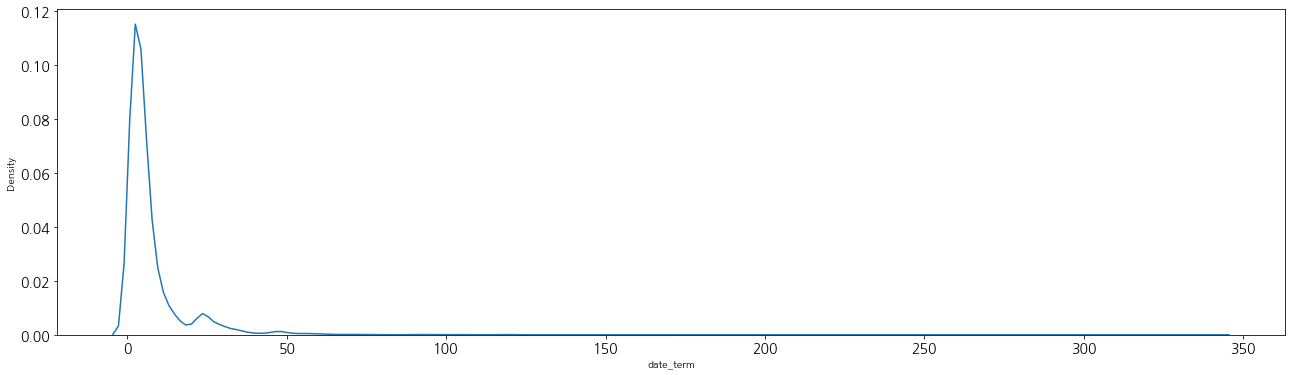

In [43]:
sns.kdeplot(df1['date_term'])

In [44]:
df1['gender'] = df1['gender'].astype(int)
df1['car_model'] = df1['car_model'].astype(int)

In [45]:
df1.describe()

,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,r_weeknum,r_year,s_weeknum,s_year,date_term,term_normal
count,22645.000000,22645.000000,22645.000000,22645.000000,22645.000000,22645.000000,22645.000000,22645.0,22645.000000,22645.0,22645.000000,22645.000000
mean,1.728682,0.881607,2.717465,3.148333,3.105189,0.308633,25.626849,2019.0,25.595805,2019.0,7.475526,0.021441
std,0.889571,0.413065,1.867170,1.999677,1.978415,0.461940,13.645933,0.0,13.642898,0.0,11.586714,0.034018
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2019.0,1.000000,2019.0,0.170000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,14.000000,2019.0,14.000000,2019.0,2.240000,0.006000
50%,1.000000,1.000000,2.000000,3.000000,3.000000,0.000000,26.000000,2019.0,26.000000,2019.0,4.120000,0.012000
75%,2.000000,1.000000,4.000000,5.000000,5.000000,1.000000,37.000000,2019.0,37.000000,2019.0,7.460000,0.021000
max,5.000000,2.000000,11.000000,6.000000,6.000000,1.000000,48.000000,2019.0,48.000000,2019.0,340.830000,1.000000


In [46]:
df2 = df1[['age_group', 'gender','car_model','r_week_day','s_week_day', 
           'is_weekend','r_weeknum','s_weeknum','date_term','term_normal']]

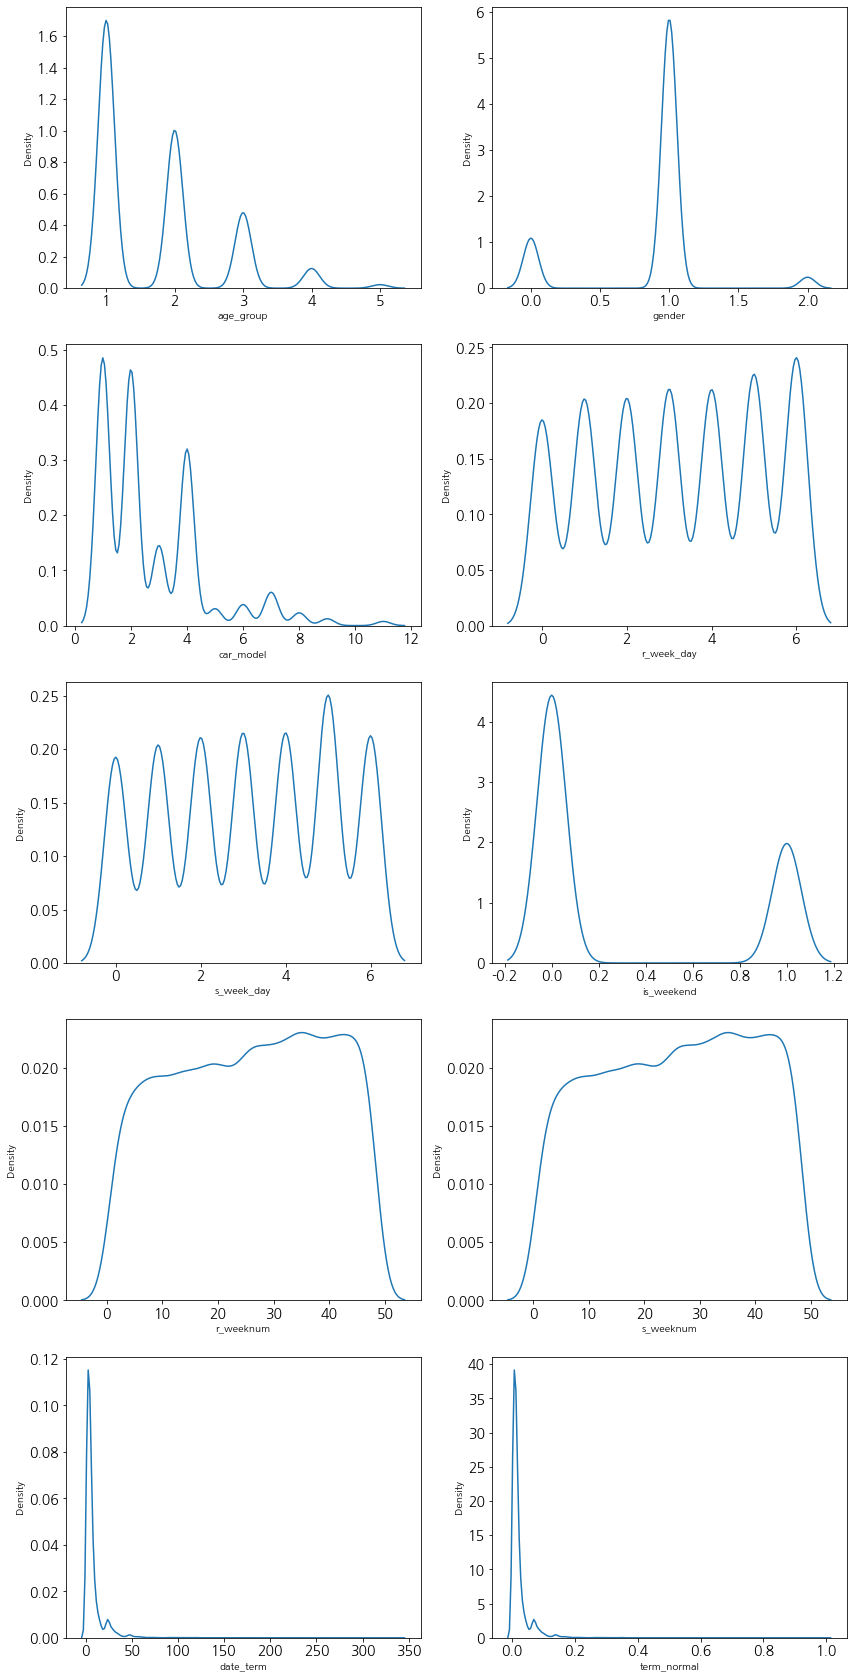

In [47]:
# 5) data 호가인 grapes ............... 중요 log변환  
# 아래거 하 ㄴ후 다시
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(5, 2, figsize=(14, 30))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 0
columns = df2.columns
for row in range(5):
    for col in range(2):
        sns.kdeplot(df2[columns[count]], ax=ax[row][col])
        #ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 10:
            break

In [48]:
len(df1)

22645

In [49]:
# # 이상치 확인 : Pclass 이상치 없음(95% 수준), age(95% 초과 : 69개  )
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index

In [50]:
outlier_df = df1.loc[outlier(df1, 'date_term', 1)]   #2=95, 1 =68%
print(len(outlier_df))
print(round(len(outlier_df)/len(df1),2))

20440
0.9


In [51]:
# outlier_df = outlier_df.loc[outlier(outlier_df, 'age_group', 2)]
# len(outlier_df)

In [52]:
# outlier_df = outlier_df.loc[outlier(outlier_df, 'car_model', 2)]
# len(outlier_df)

In [53]:
# outlier_df = outlier_df.loc[outlier(outlier_df, 's_weeknum', 2)]
# len(outlier_df)

In [54]:
def arima_sarima(data):
    print('ARIMA')
    df_function = pd.DataFrame(data['reservation_start_date'].value_counts())
    df_function.reset_index(inplace = True)
    df_function.columns = ['Date', 'Demand']
    df_function.sort_values(by = ['Date'], inplace = True)
    df_function['Date'] = df_function['Date'].astype(str)

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))  
    plt.plot(df_function['Date'], df_function['Demand'])
    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 30.0) 
    ax.xaxis.set_major_locator(loc)
    plt.show()

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))  
    plt.plot(df_function['Date'][0:100], df_function['Demand'][0:100], "b.-")
    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 7.0) 
    ax.xaxis.set_major_locator(loc)
    plt.show()

    df_function['Date'] = pd.to_datetime(df_function['Date'])
    df_function.set_index('Date', inplace = True)

    demand_rate = df_function['Demand']
    STL_decomposed = STL(demand_rate, seasonal = 7, period = 7).fit()
    fig = STL_decomposed.plot()
    fig.set_size_inches(10, 16)

    for ax in fig.axes :
        loc = plticker.MultipleLocator(base = 30.0) 
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_minor_locator(loc)
        ax.tick_params(axis='x', labelrotation = 45)
    
    plt.show()
    print(STL_decomposed.resid[STL_decomposed.resid > 0.1])

    demand_rate_replace = demand_rate.copy()
    demand_rate_replace[STL_decomposed.resid>0.1] = np.NaN
    demand_rate_replace = demand_rate_replace.interpolate(method='linear') 

    STL_decomposed_replace = STL(demand_rate_replace, seasonal = 7, period = 7).fit()
    fig = STL_decomposed_replace.plot()
    fig.set_size_inches(10, 16)

    for ax in fig.axes :
        loc = plticker.MultipleLocator(base = 30.0) 
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_minor_locator(loc)
        ax.tick_params(axis='x', labelrotation = 45)
    
    plt.show()
    print(STL_decomposed_replace.resid[STL_decomposed_replace.resid > 0.1])    

    plot_acf(demand_rate_replace)
    plot_pacf(demand_rate_replace)
    plt.show()

    demand_rate_diff = demand_rate_replace.diff(7).dropna()
    plot_acf(demand_rate_diff)
    plot_pacf(demand_rate_diff)
    plt.show()

    demand_rate_diff = pd.DataFrame(demand_rate_diff)
    demand_rate_diff.columns = ['Diff']

    p_value = adfuller(demand_rate_diff.reset_index().Diff)[1]
    print(f'p-value of ADF test (diff 7): {p_value}')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    plt.plot(demand_rate_diff.reset_index().Diff);
    plt.show()

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    plt.plot(demand_rate_diff.reset_index().Diff[0:100], "b.-")
    plt.show()

    arima_rate_train = demand_rate_diff[demand_rate_diff.index<'2019-09-08']
    arima_rate_test = demand_rate_diff[demand_rate_diff.index>='2019-09-08']
    model = sm.tsa.arima.ARIMA(arima_rate_train, order=(3, 1, 1))  
    fitted_m = model.fit()  
    print(fitted_m.summary())

    plot_predict(fitted_m)
    plt.show()

    fc = fitted_m.forecast(len(arima_rate_test), alpha = 0.05)  

    arima_rmse = np.sqrt(sklearn.metrics.mean_squared_error(arima_rate_test, fc))
    print(f'Test RMSE: {arima_rmse}\n')

    fc_series = pd.Series(fc, index = arima_rate_test.index)   

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))

    plt.plot(arima_rate_train, alpha = 0.5, color = 'black', label = 'training')
    plt.plot(arima_rate_test, alpha = 0.5, color = 'red', label = 'actual operation rate')
    plt.plot(fc_series, alpha = 0.5, color = 'blue', label = 'predicted operation rate')
    plt.legend()

    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 30.0) 
    ax.xaxis.set_major_locator(loc)

    plt.show()

    print('\n\n\n\nSARIMA')
    model_auto_arima = pm.auto_arima(arima_rate_train, seasonal = True, m = 7, D = 1) 
    print(model_auto_arima)
    print(model_auto_arima.params())
    print(model_auto_arima.aic())

    sarima_rate_pred, conf_int = model_auto_arima.predict(n_periods = arima_rate_test.shape[0], return_conf_int = True)
    sarima_rmse = np.sqrt(sklearn.metrics.mean_squared_error(arima_rate_test, sarima_rate_pred))
    print(f'Test RMSE: {sarima_rmse}\n')

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 7.0) 
    ax.xaxis.set_major_locator(loc)

    plt.plot(arima_rate_train[-50:], alpha = 0.5, color = 'black', label = 'training')
    plt.plot(arima_rate_test, alpha = 0.5, color = 'red', label = 'actual operation rate')
    plt.plot(arima_rate_test.index.values, sarima_rate_pred, alpha = 0.5, color = 'blue', label = 'predicted operation rate')
    plt.fill_between(arima_rate_test.index.values, conf_int[:, 0], conf_int[:, 1], alpha = 0.1, color = 'b') 
    plt.legend()
    plt.show()

    model_auto_arima.plot_diagnostics(figsize=(10, 10))
    plt.show()

ARIMA


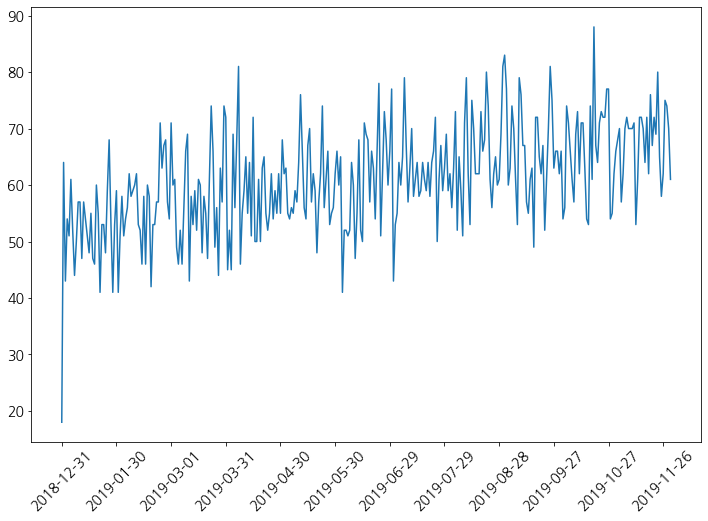

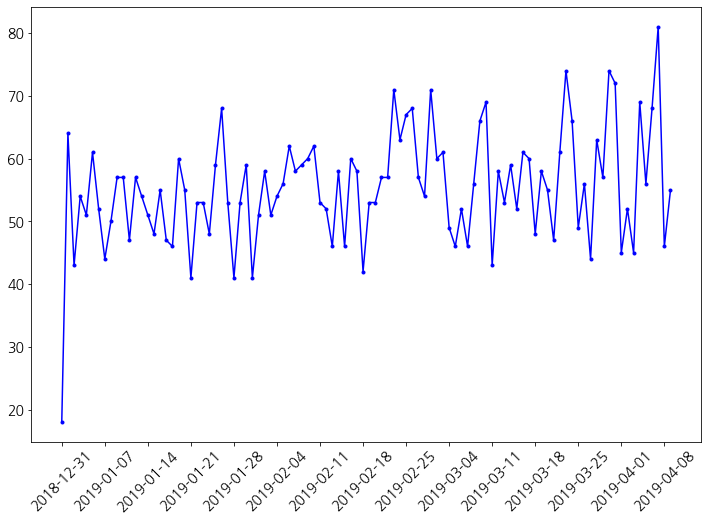

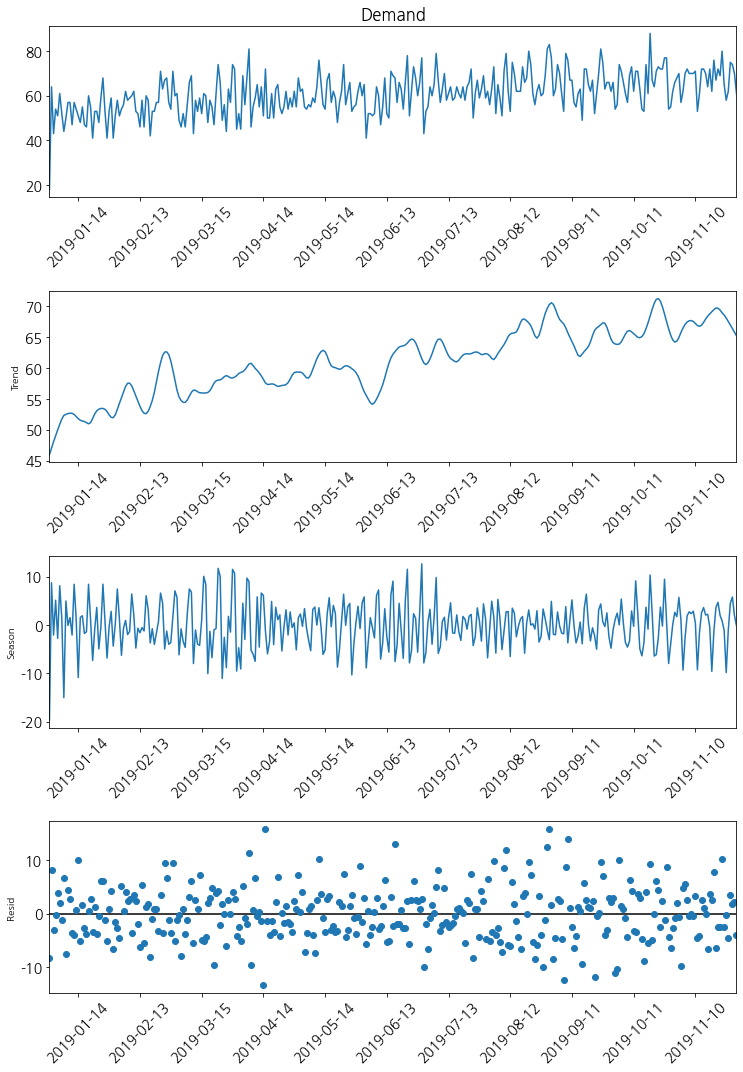

Date
2019-01-01     8.202204
2019-01-04     3.781816
2019-01-05     1.975335
2019-01-07     6.708848
2019-01-09     4.462408
                ...    
2019-11-19     7.852586
2019-11-23    10.210539
2019-11-27     3.517713
2019-11-28     1.794404
2019-11-29     2.205479
Name: resid, Length: 166, dtype: float64


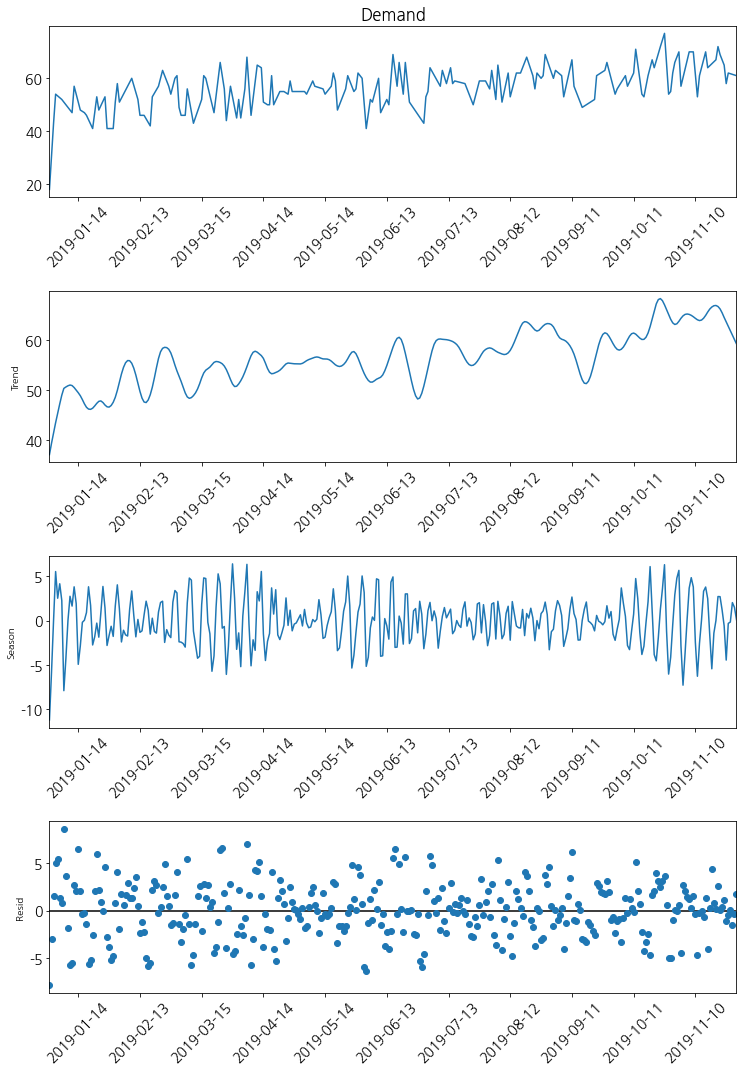

Date
2019-01-02    1.503132
2019-01-03    5.005661
2019-01-04    5.437567
2019-01-05    1.301879
2019-01-06    0.773011
                ...   
2019-11-20    0.117094
2019-11-21    2.605344
2019-11-23    0.369794
2019-11-24    1.109642
2019-11-30    1.705072
Name: resid, Length: 163, dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


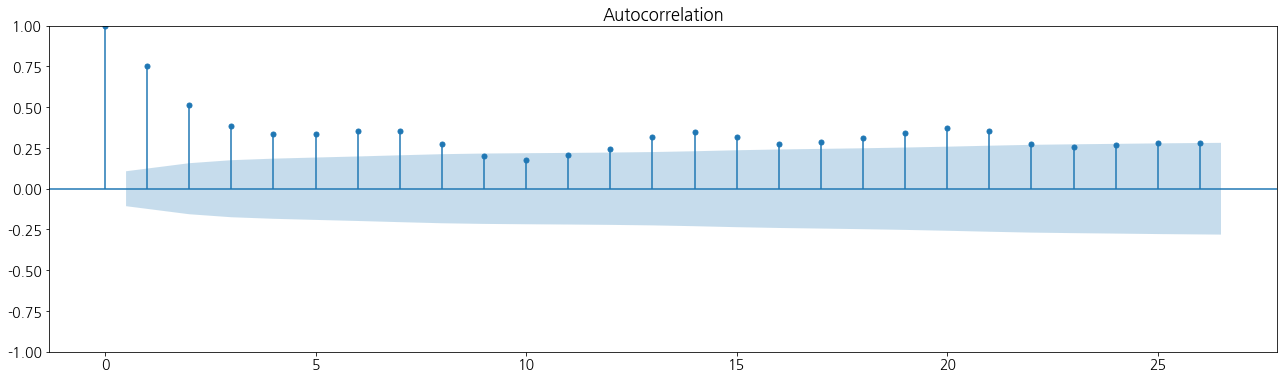

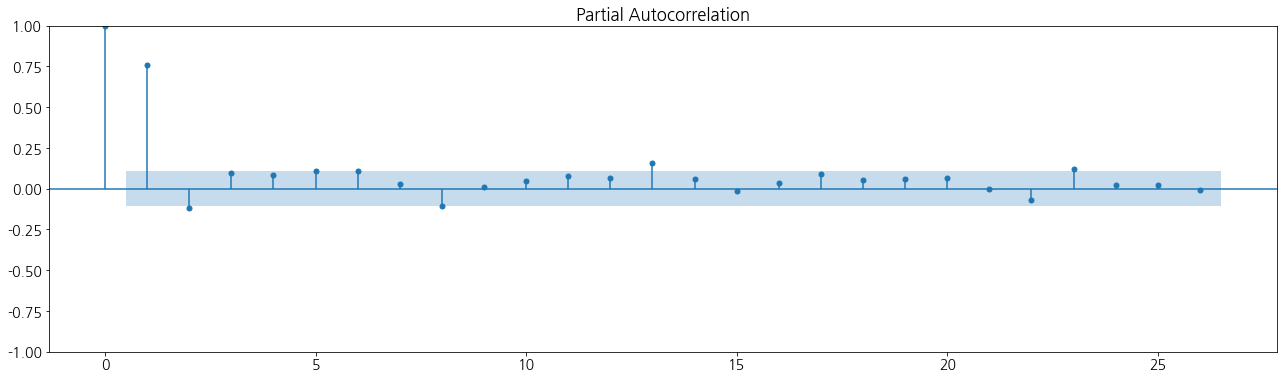

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


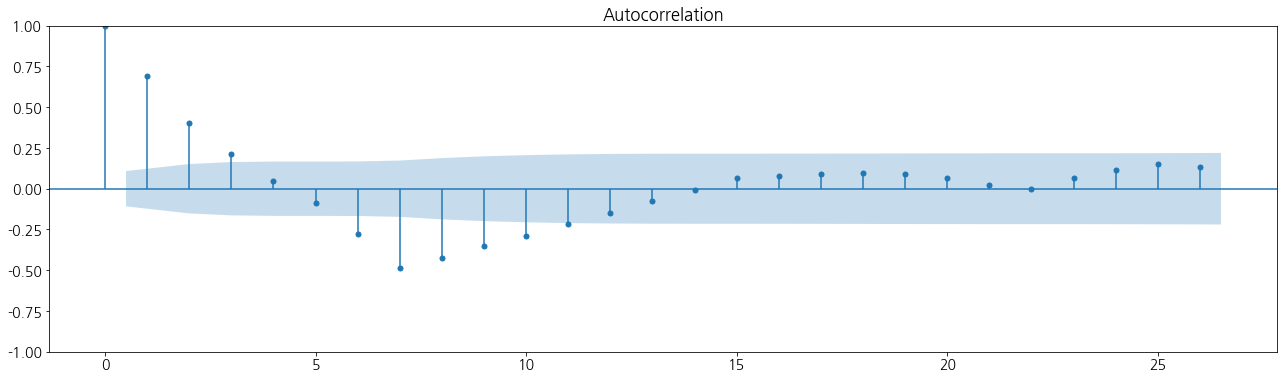

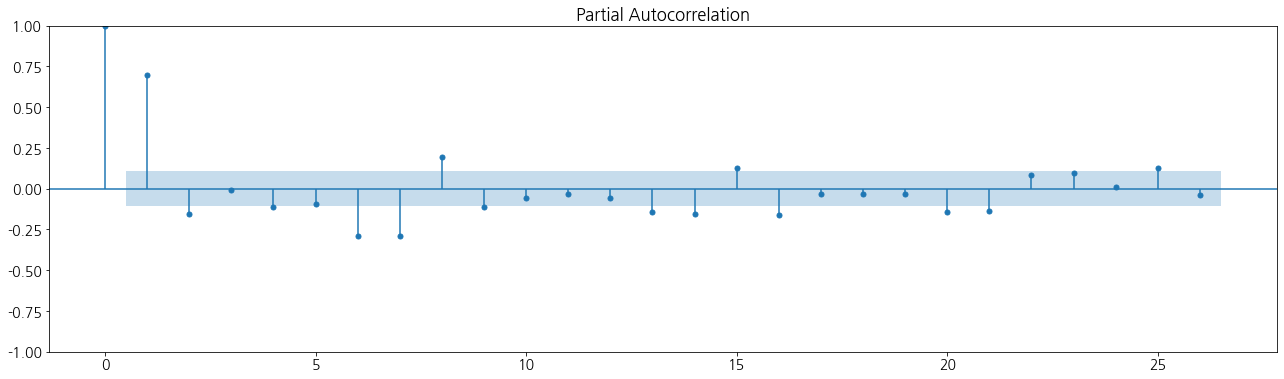

p-value of ADF test (diff 7): 4.51063121497355e-10


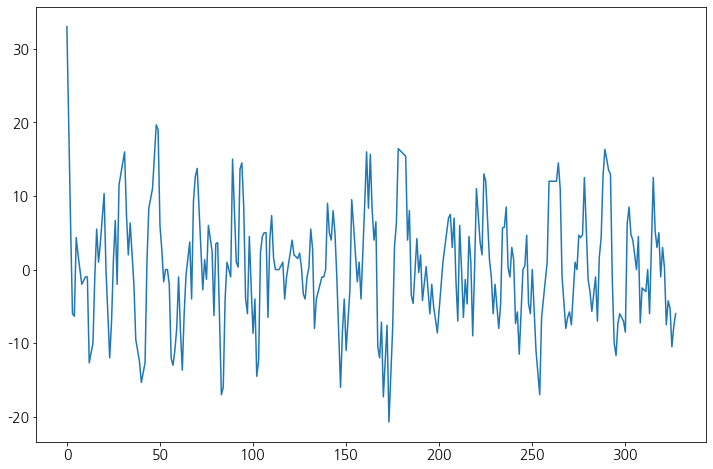

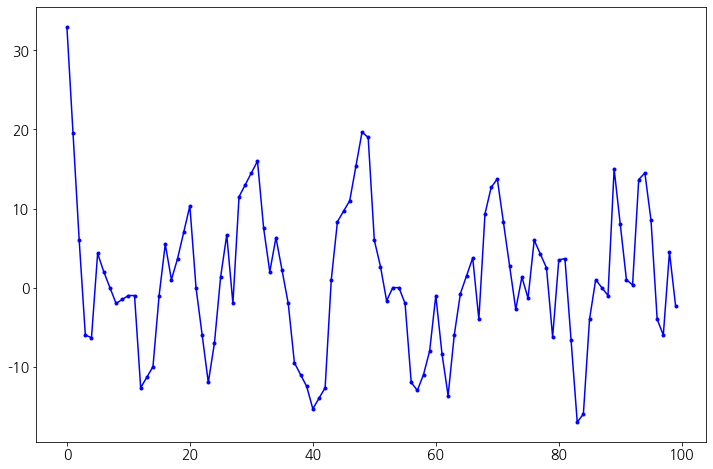

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                  244
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -769.477
Date:                Mon, 23 Jan 2023   AIC                           1548.954
Time:                        06:05:03   BIC                           1566.419
Sample:                    01-07-2019   HQIC                          1555.989
                         - 09-07-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8515      0.073     11.735      0.000       0.709       0.994
ar.L2         -0.1883      0.090     -2.081      0.037      -0.366      -0.011
ar.L3          0.0162      0.066      0.247      0.8

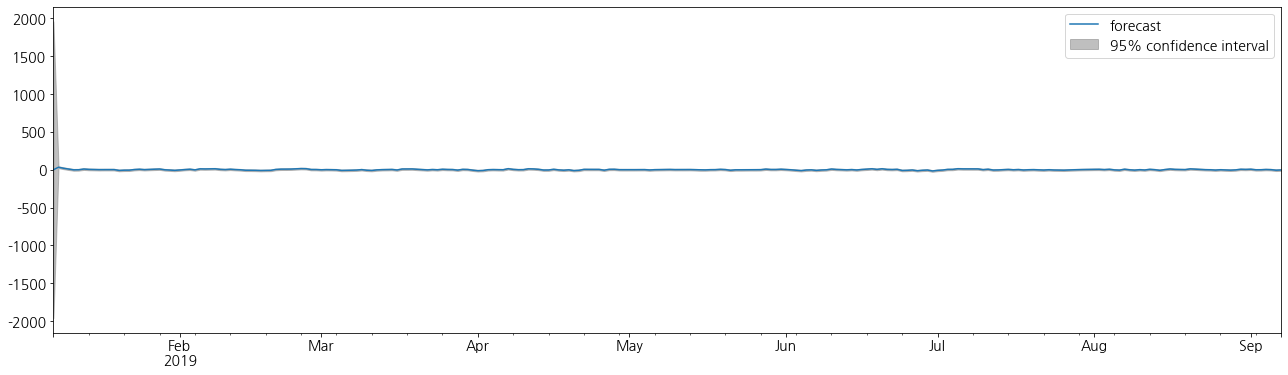

Test RMSE: 7.5694939931604805



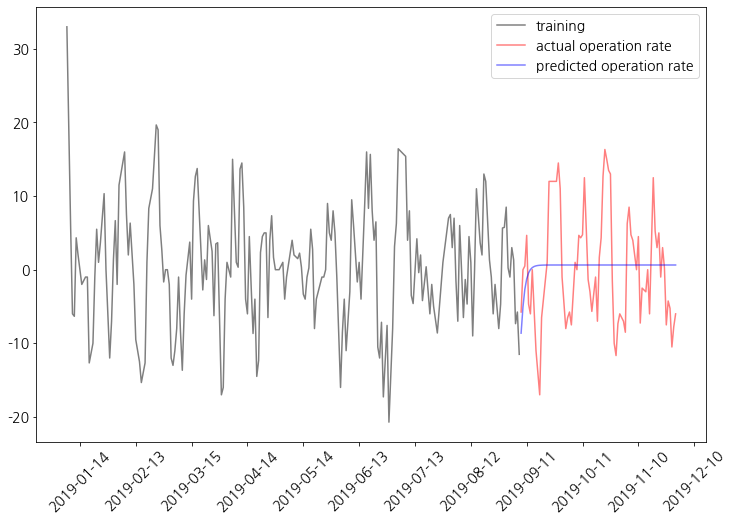





SARIMA
 ARIMA(1,0,1)(2,1,0)[7]          
[ 0.52188526  0.34650584 -0.95840685 -0.56142301 40.03857916]
1566.4356724410263
Test RMSE: 7.918481261999037



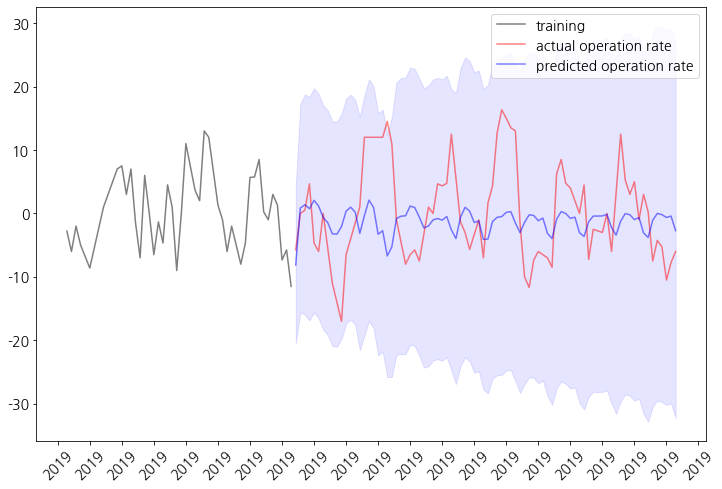

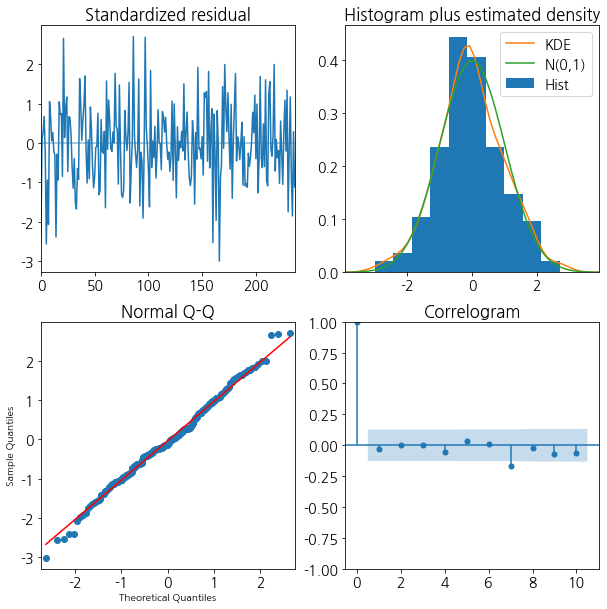

In [55]:
arima_sarima(outlier_df)

In [56]:
#age_group 제외
age1_df1 = outlier_df[outlier_df['age_group'] <= 3]
print(len(age1_df1))
car_df1 = age1_df1[age1_df1['car_model'] <= 4]
print(len(car_df1))
# age1_df1 = age1_df1.loc[outlier(age1_df1, 'age_group', 2)]
# print(len(age1_df1))

19565
17616


ARIMA


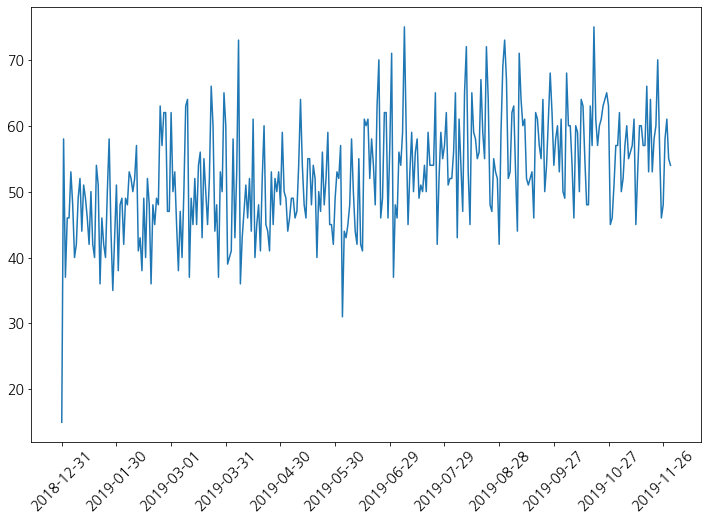

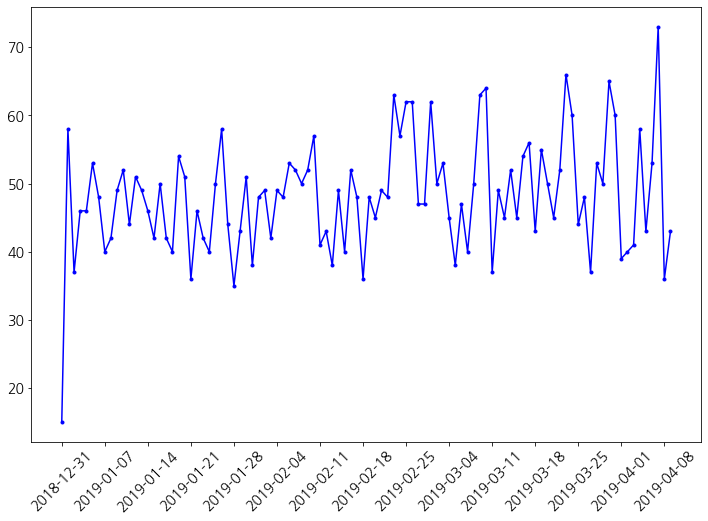

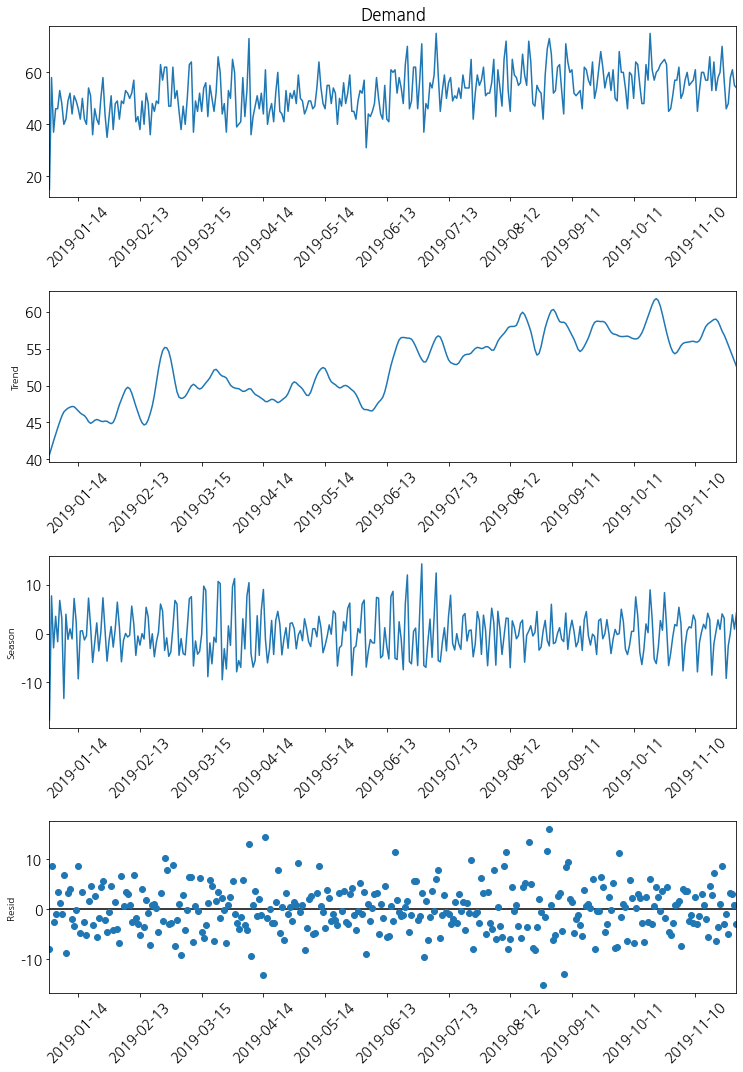

Date
2019-01-01    8.702292
2019-01-04    3.436199
2019-01-05    1.139705
2019-01-07    6.885769
2019-01-09    3.262154
                ...   
2019-11-22    1.103949
2019-11-23    8.611520
2019-11-27    3.167792
2019-11-28    3.133559
2019-11-29    0.811333
Name: resid, Length: 161, dtype: float64


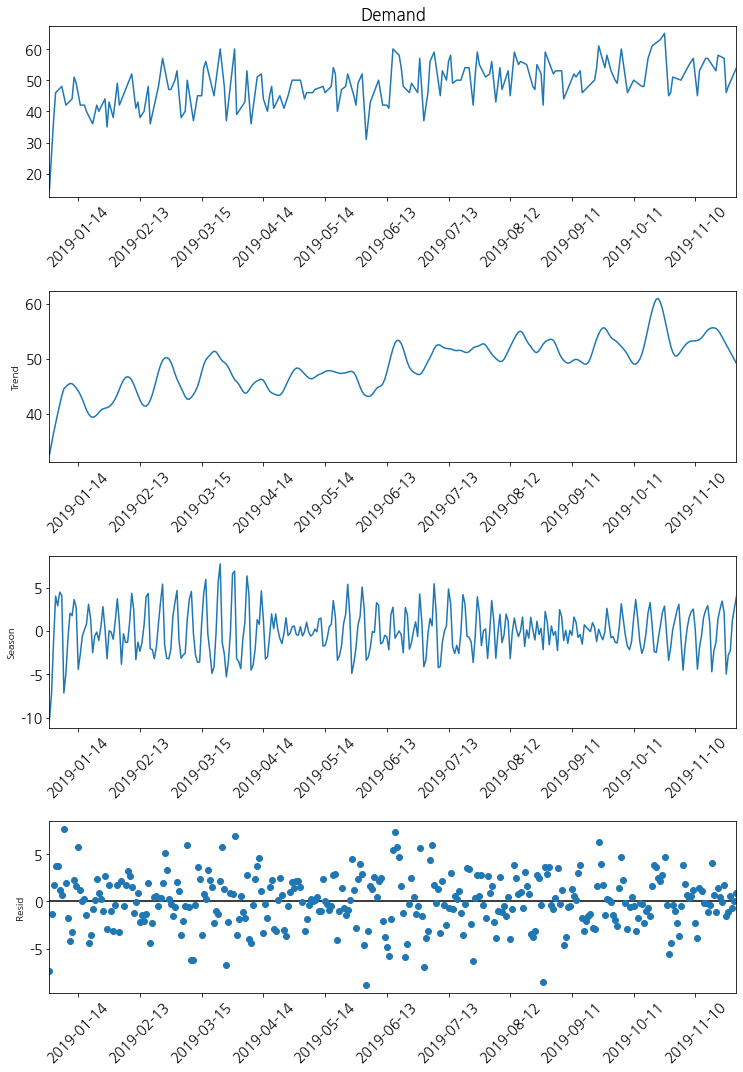

Date
2019-01-02    1.709109
2019-01-03    3.717635
2019-01-04    3.778746
2019-01-05    1.196097
2019-01-06    0.661972
                ...   
2019-11-21    1.454197
2019-11-22    0.518714
2019-11-24    1.692866
2019-11-27    0.583249
2019-11-30    0.857480
Name: resid, Length: 165, dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


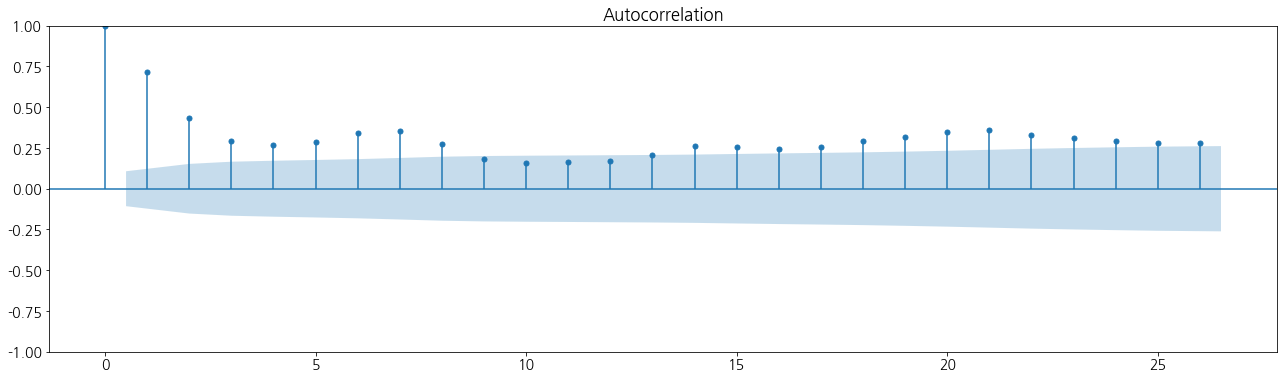

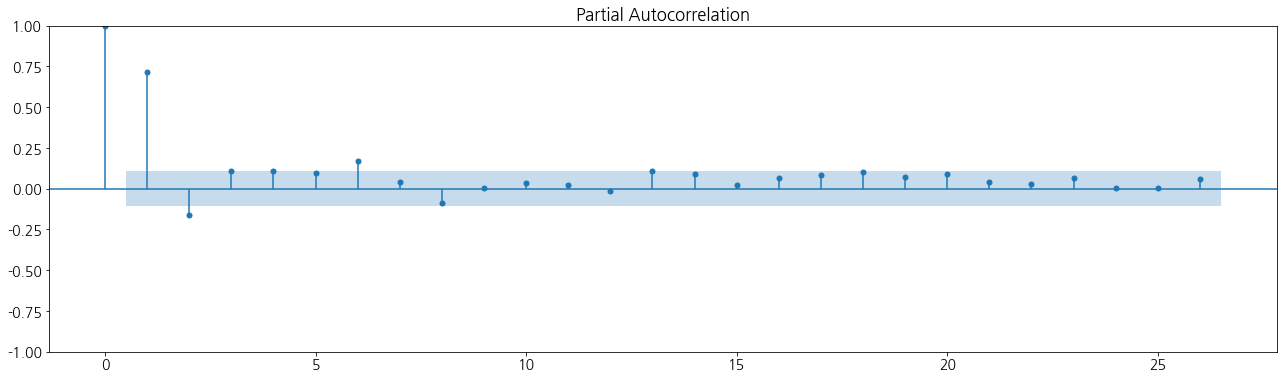

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


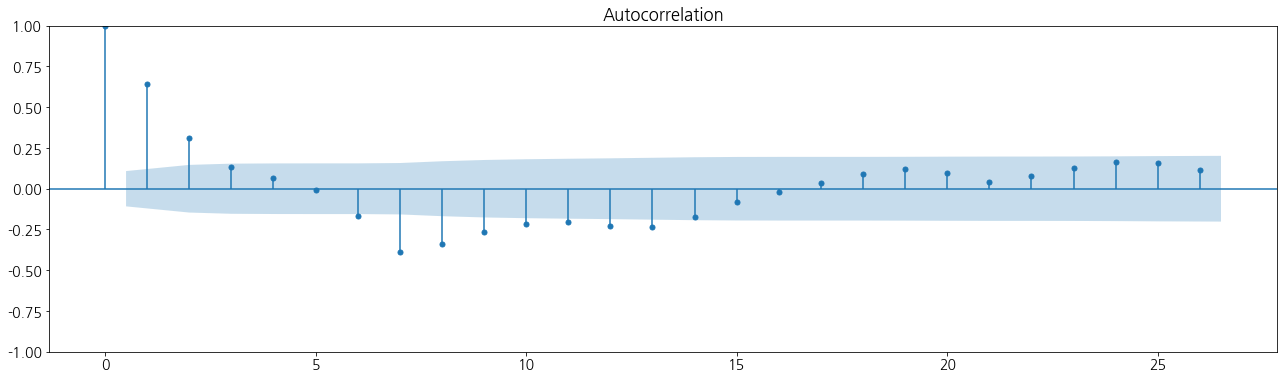

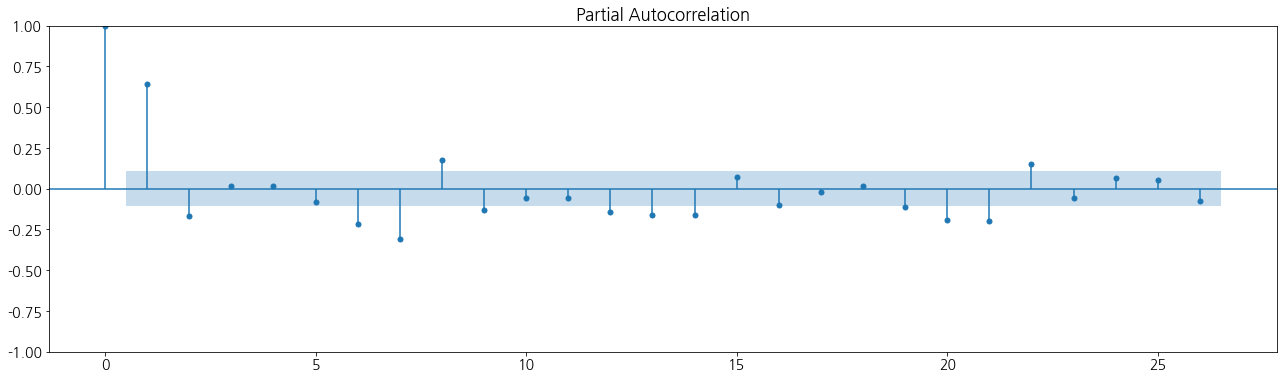

p-value of ADF test (diff 7): 5.0143625473942405e-11


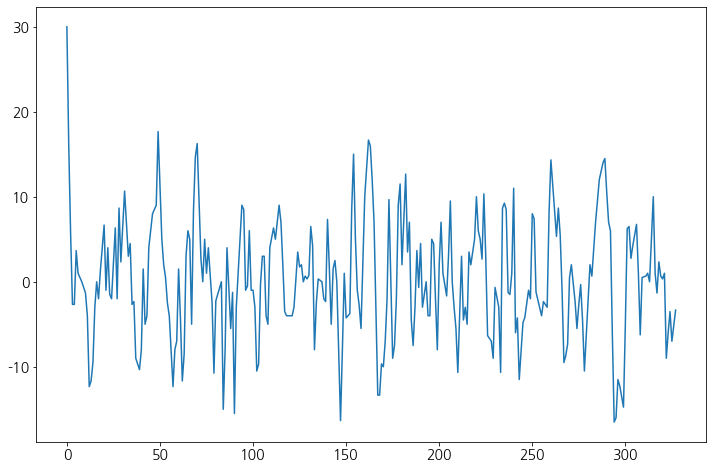

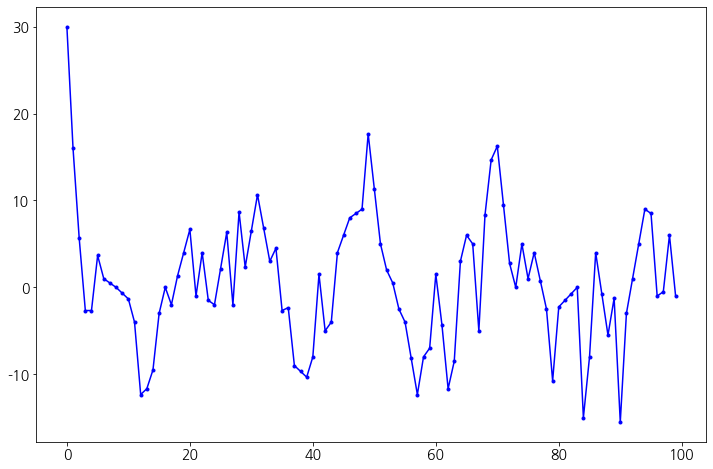

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                  244
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -755.542
Date:                Mon, 23 Jan 2023   AIC                           1521.083
Time:                        06:05:46   BIC                           1538.549
Sample:                    01-07-2019   HQIC                          1528.118
                         - 09-07-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7406      0.065     11.418      0.000       0.613       0.868
ar.L2         -0.1732      0.086     -2.018      0.044      -0.342      -0.005
ar.L3         -0.0003      0.070     -0.004      0.9

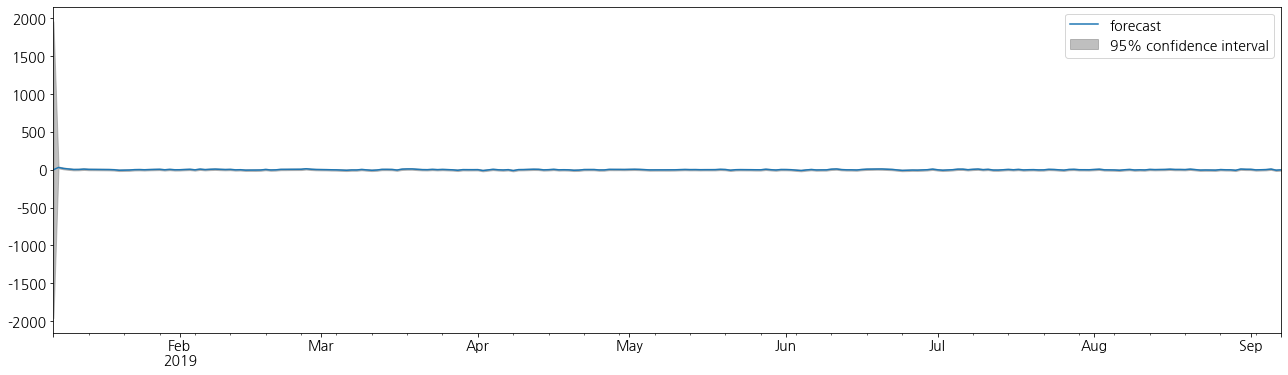

Test RMSE: 7.038783670950036



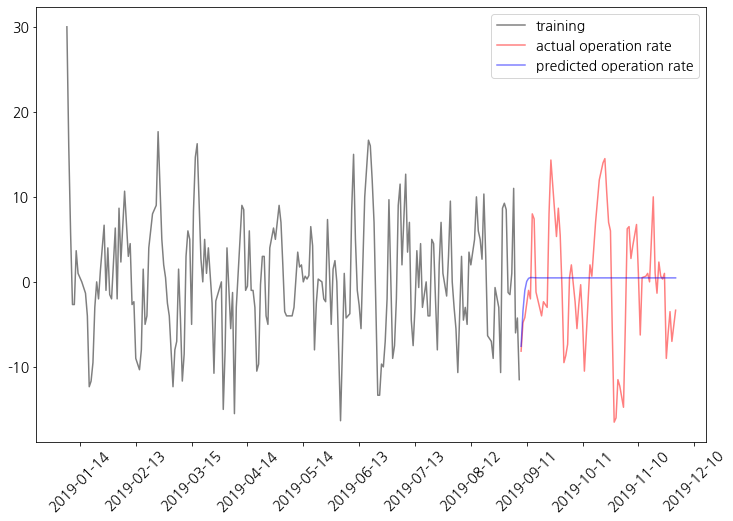





SARIMA
 ARIMA(3,0,1)(2,1,0)[7]          
[-0.21627196  0.47957555 -0.29237902  0.96628796 -0.86920195 -0.48375775
 39.70228852]
1567.038607629563
Test RMSE: 7.4900434379764045



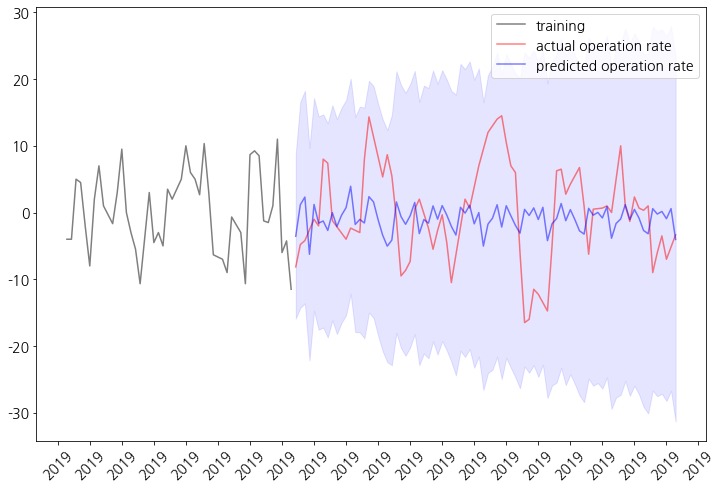

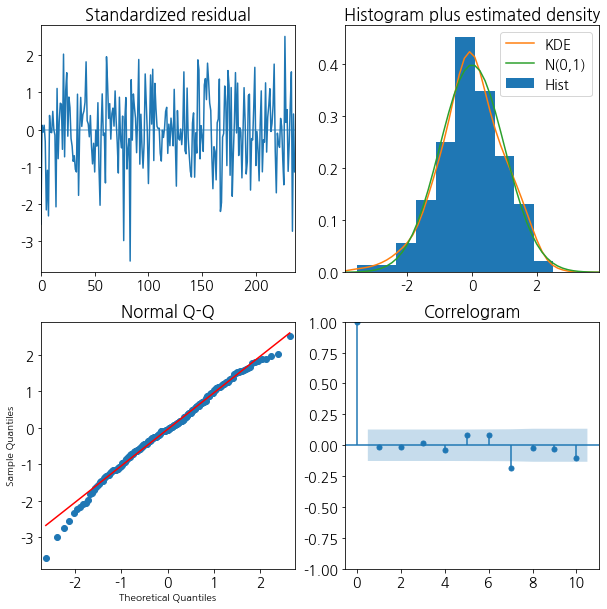

In [57]:
arima_sarima(car_df1)